In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import exp, expm1, log, sqrt
from collections import Counter

data_train = pd.read_csv('data_train.csv', 
                         names = ["age", "workclass", "del", "del_2", 
                                  "education", "marital-status", 
                                  "occupation", "del_3", "race", 
                                  "sex", "capital-gain", "capital-loss", 
                                  "hours-per-week", "native-country", "y"])
data_test = pd.read_csv('data_test.csv')

make_y_number = lambda t: 1 if t == ' >50K' else 0
y_num = np.vectorize(make_y_number)
#gen_neut_relationship = lambda t: 'married' if (t == 'Husband' or t == "Wife") else t
#gen_neut_relationship = np.vectorize(gen_neut_relationship)
data_train["y"] = y_num(data_train["y"])
#data_train["relationship"] = gen_neut_relationship(data_train["relationship"])
data_train = data_train.drop(columns=["del", "del_2", "del_3"])

#correlation matrix
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [2]:
def get_num(feature, fclass):
    return data_train[data_train[feature] == fclass].size
def get_p(feature, fclass):
    return np.mean(data_train[data_train[feature] == fclass]['y'])
get_p = np.vectorize(get_p)
def make_dict(feature):
    return dict(zip(np.asarray(list(Counter(data_train[feature]))), get_p( feature, np.asarray(list(Counter(data_train[feature]))))))
def make_mean_col(dic, col):
    return dic[col]
make_mean_col = np.vectorize(make_mean_col)

In [3]:
import collections

dic_age = make_dict('age')
dic_workclass = make_dict('workclass')
dic_occupation = make_dict('occupation')
dic_race = make_dict('race')
dic_sex = make_dict('sex')
dic_country = make_dict('native-country')
dic_education = make_dict('education')
dic_gain = make_dict('capital-gain')
dic_loss = make_dict('capital-loss')

make_dict('race')
#collections.OrderedDict(sorted(make_dict('hours-per-week').items()))
#make_dict('marital-status')

{' White': 0.2558599367270636,
 ' Black': 0.12387964148527529,
 ' Asian-Pac-Islander': 0.26564003849855633,
 ' Amer-Indian-Eskimo': 0.1157556270096463,
 ' Other': 0.09225092250922509}

Intercept: 
 -0.6784303487277907
Coefficients: 
 [0.25340931 0.08516215 0.43863759 0.60280735 0.28222468 0.1271922
 0.08633833 0.7401698  0.7083394  0.23409246 0.25891669]


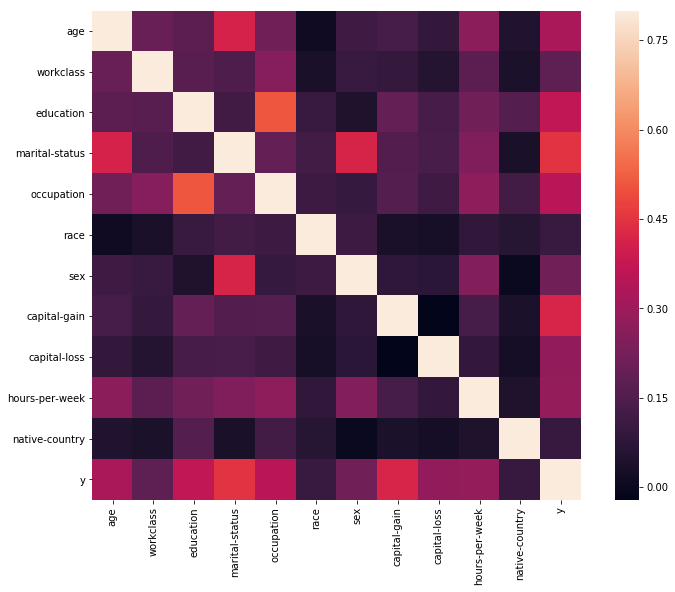

In [4]:
#### colour code y variable in seaborn
row_names_x = ["age", "workclass", "education", 
                                  "marital-status", 
                                  "occupation", "race", 
                                  "sex", "capital-gain", "capital-loss", 
                                  "hours-per-week", "native-country"]
for i in range(0, 11):
    data_train[row_names_x[i]] = make_mean_col(make_dict(row_names_x[i]), data_train[row_names_x[i]])
#display(data_train)
from sklearn import linear_model
from sklearn import metrics
ols = linear_model.LinearRegression()
ols.fit(data_train.drop(columns=['y']), data_train['y'])
print('Intercept: \n', ols.intercept_)
print('Coefficients: \n', ols.coef_)

corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Counter({0.44903381642512075: 4140, 0.22664064405952672: 4099, 0.4840137727496311: 4066, 0.13448275862068965: 3770, 0.2693150684931507: 3650, 0.04157814871016692: 3295, 0.12487512487512488: 2002, 0.10363537710255019: 1843, 0.20037570444583594: 1597, 0.06277372262773723: 1370, 0.11569416498993963: 994, 0.30495689655172414: 928, 0.325115562403698: 649, 0.006711409395973154: 149, 0.1111111111111111: 9})


,education,occupation,y
0,13,0.134483,0
1,13,0.484014,0
2,9,0.062774,0
3,7,0.062774,0
4,13,0.449034,0
5,14,0.484014,0
6,5,0.041578,0
7,9,0.484014,1
8,14,0.449034,1
9,13,0.484014,1


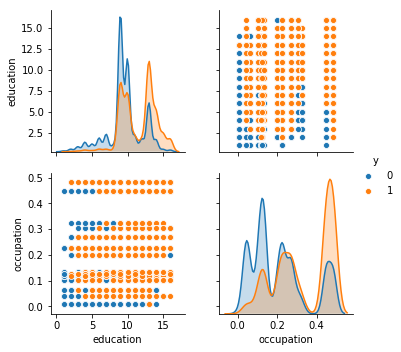

In [16]:
# Removing correlations between occupation and education
# Process: create function f(occ, edu) -> y such that y is normally distributed

data_train = pd.read_csv('data_train.csv', 
                         names = ["age", "workclass", "del", "del_2", 
                                  "education", "marital-status", 
                                  "occupation", "del_3", "race", 
                                  "sex", "capital-gain", "capital-loss", 
                                  "hours-per-week", "native-country", "y"])
make_y_number = lambda t: 1 if t == ' >50K' else 0
y_num = np.vectorize(make_y_number)
data_train["y"] = y_num(data_train["y"])
data_train = data_train.drop(columns=["age", "workclass", "del", "del_2", "del_3", 
                                      "marital-status", "race", "sex", "capital-gain",
                                      "capital-loss", "hours-per-week", "native-country"])
data_train['occupation'] = make_mean_col(make_dict('occupation'), data_train['occupation'])
print(Counter(data_train['occupation']))
g = sns.pairplot(data_train, vars=["education", "occupation"], hue="y")
display(data_train)